<a href="https://colab.research.google.com/github/hrutik016/lung-cancer-detect/blob/master/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive,files

drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import os
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras import models,layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [3]:
def getDataSize(path):
  image_count = {}

  for x in os.listdir(path):
    image_count[x] = len(os.listdir(os.path.join(path, x)))

  return image_count

In [4]:
train_path = '/content/drive/MyDrive/AML Project/train'
test_path = '/content/drive/MyDrive/AML Project/test'
valid_path = '/content/drive/MyDrive/AML Project/valid'

In [5]:
batch_size = 16

In [6]:
def generateImage(path):
  generate_data = ImageDataGenerator(rescale=1.0/255.0,
                                horizontal_flip=True,
                                fill_mode='nearest',
                                zoom_range=0.2,
                                shear_range=0.2,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                rotation_range=30)

  return generate_data.flow_from_directory(path, batch_size=batch_size, target_size=(224, 224), color_mode='grayscale', class_mode='categorical')

In [7]:

def generateImageRGB(path):
  generate_data = ImageDataGenerator(rescale=1.0/255.0,
                                horizontal_flip=True,
                                fill_mode='nearest',
                                zoom_range=0.2,
                                shear_range=0.2,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                rotation_range=30)

  return generate_data.flow_from_directory(path, batch_size=batch_size, target_size=(224, 224), class_mode='categorical')

In [8]:
train_data = generateImage(train_path)
test_data = generateImage(test_path)
valid_data = generateImage(valid_path)

Found 743 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 105 images belonging to 4 classes.


In [9]:
number_of_classes = len(train_data.class_indices)

In [10]:
train_data.class_indices

{'adenocarcinoma': 0,
 'large_cell_carcinoma': 1,
 'normal': 2,
 'squamous_cell_carcinoma': 3}

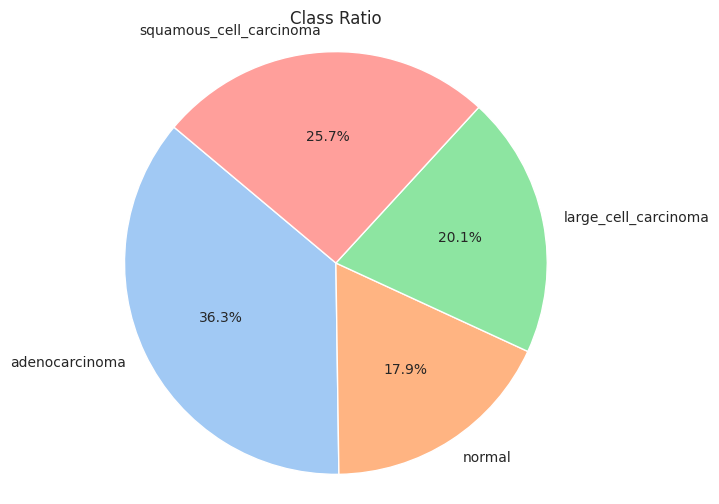

In [19]:
class_folders = os.listdir(train_path)

class_counts = {}
for class_folder in class_folders:
    class_path = os.path.join(train_path, class_folder)
    class_count = len(os.listdir(class_path))
    class_counts[class_folder] = class_count

plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Class Ratio')
plt.axis('equal')
plt.show()

## Basic Sequential Model

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, GlobalAveragePooling2D
model_sq = Sequential()
model_sq.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(224,224,1)))

model_sq.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model_sq.add(MaxPool2D())
model_sq.add(Dropout(rate=0.25))

model_sq.add(Flatten())

model_sq.add(Dense(units=64,activation='relu'))
model_sq.add(Dropout(rate=0.33))

model_sq.add(Dense(units=number_of_classes,activation='softmax'))

model_sq.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model_sq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 flatten (Flatten)           (None, 774400)            0         
                                                                 
 dense (Dense)               (None, 64)                49561664  
                                                        

In [13]:

history_sq = model_sq.fit(x=train_data, steps_per_epoch=6, epochs=20, validation_data=test_data, validation_steps=8)

Epoch 1/20
6/6 [==============================] - 66s 11s/step - loss: 4.2810 - accuracy: 0.2414 - val_loss: 1.3229 - val_accuracy: 0.2992
Epoch 2/20
6/6 [==============================] - 42s 7s/step - loss: 1.4878 - accuracy: 0.2396 - val_loss: 1.3550 - val_accuracy: 0.2835
Epoch 3/20
6/6 [==============================] - 42s 7s/step - loss: 1.3637 - accuracy: 0.3646 - val_loss: 1.3752 - val_accuracy: 0.4803
Epoch 4/20
6/6 [==============================] - 35s 6s/step - loss: 1.3758 - accuracy: 0.4943 - val_loss: 1.3603 - val_accuracy: 0.4724
Epoch 5/20
6/6 [==============================] - 48s 8s/step - loss: 1.3520 - accuracy: 0.3646 - val_loss: 1.3220 - val_accuracy: 0.4252
Epoch 6/20
6/6 [==============================] - 37s 6s/step - loss: 1.2168 - accuracy: 0.4583 - val_loss: 1.3825 - val_accuracy: 0.2677
Epoch 7/20
6/6 [==============================] - 35s 6s/step - loss: 1.3388 - accuracy: 0.3563 - val_loss: 1.1772 - val_accuracy: 0.4724
Epoch 8/20
6/6 [=================

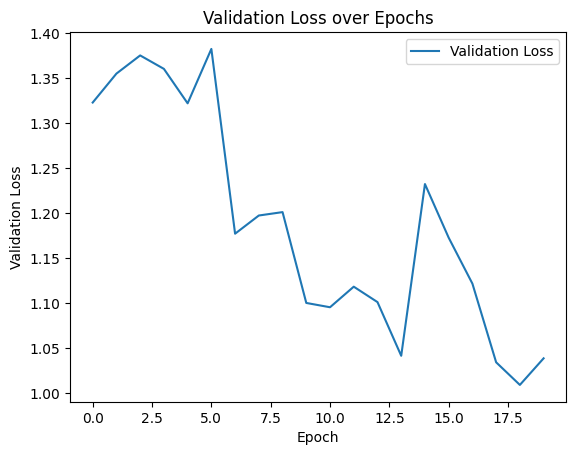

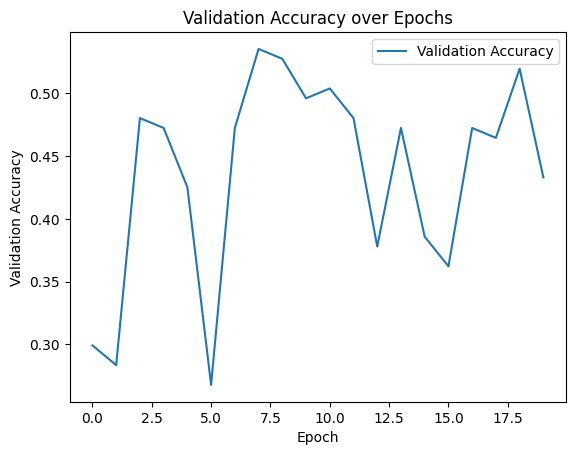

In [14]:
## Plotting

plt.plot(history_sq.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs')
plt.legend()
plt.show()

# Plot validation accuracy over epochs
plt.plot(history_sq.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.legend()
plt.show()

## MobileNet

In [15]:
train_data = generateImageRGB(train_path)
test_data = generateImageRGB(test_path)
valid_data = generateImageRGB(valid_path)

Found 743 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 105 images belonging to 4 classes.


In [16]:
from keras.applications import MobileNetV2
from keras.models import Model

base_model = MobileNetV2(weights='imagenet', include_top=False)

for layer in base_model.layers:
  layer.trainable = False

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)
x=Dense(128,activation='relu')(x)
preds=Dense(number_of_classes,activation='softmax')(x) #final layer with softmax activation

model_mv=Model(inputs=base_model.input,outputs=preds)

9406464/9406464 [==============================] - 0s 0us/step


Epoch 1/20
47/47 [==============================] - 60s 1s/step - loss: 1.1222 - accuracy: 0.4738 - val_loss: 1.0534 - val_accuracy: 0.4252
Epoch 2/20
47/47 [==============================] - 58s 1s/step - loss: 0.8881 - accuracy: 0.5801 - val_loss: 0.8803 - val_accuracy: 0.5039
Epoch 3/20
47/47 [==============================] - 55s 1s/step - loss: 0.7552 - accuracy: 0.6689 - val_loss: 0.7813 - val_accuracy: 0.6063
Epoch 4/20
47/47 [==============================] - 52s 1s/step - loss: 0.6768 - accuracy: 0.7039 - val_loss: 0.6740 - val_accuracy: 0.7087
Epoch 5/20
47/47 [==============================] - 52s 1s/step - loss: 0.6499 - accuracy: 0.7147 - val_loss: 0.7076 - val_accuracy: 0.7087
Epoch 6/20
47/47 [==============================] - 54s 1s/step - loss: 0.6345 - accuracy: 0.7147 - val_loss: 0.8962 - val_accuracy: 0.5748
Epoch 7/20
47/47 [==============================] - 54s 1s/step - loss: 0.5476 - accuracy: 0.7685 - val_loss: 0.7839 - val_accuracy: 0.6693
Epoch 8/20
47/47 [==

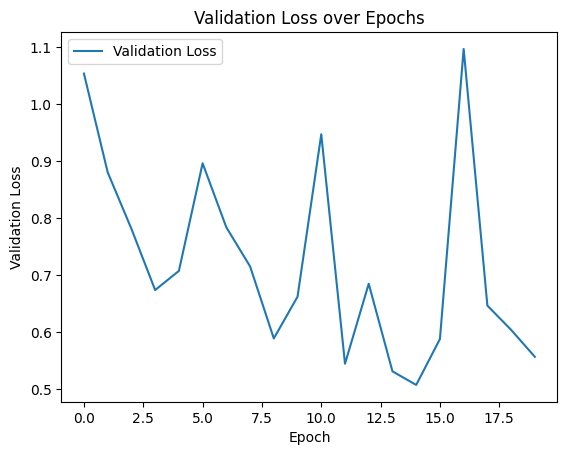

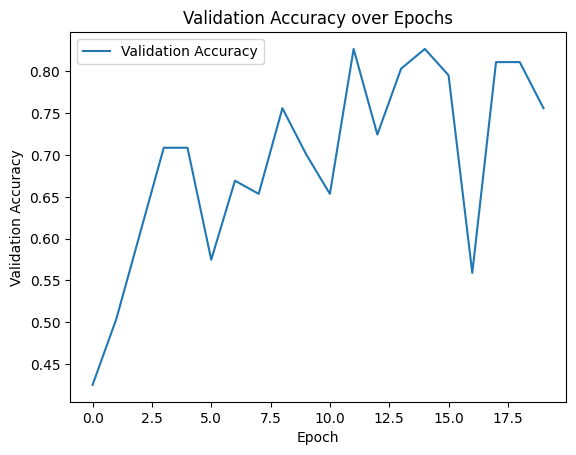

In [17]:
model_mv.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_mv = model_mv.fit(train_data, steps_per_epoch=len(train_data), epochs=20, validation_data=test_data, validation_steps=len(test_data))
plt.plot(history_mv.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs')
plt.legend()
plt.show()

plt.plot(history_mv.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.legend()
plt.show()


### VGG

In [18]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)

preds = Dense(number_of_classes, activation='softmax')(x)

model_vgg = Model(inputs=base_model.input, outputs=preds)

model_vgg.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

Epoch 1/20
47/47 [==============================] - 562s 12s/step - loss: 1.2543 - accuracy: 0.4159 - val_loss: 0.9511 - val_accuracy: 0.5433
Epoch 2/20
47/47 [==============================] - 556s 12s/step - loss: 1.0098 - accuracy: 0.5087 - val_loss: 0.8901 - val_accuracy: 0.5669
Epoch 3/20
47/47 [==============================] - 560s 12s/step - loss: 1.0125 - accuracy: 0.5101 - val_loss: 0.8978 - val_accuracy: 0.5748
Epoch 4/20
47/47 [==============================] - 557s 12s/step - loss: 0.9569 - accuracy: 0.5343 - val_loss: 0.8831 - val_accuracy: 0.5039
Epoch 5/20
47/47 [==============================] - 557s 12s/step - loss: 0.9142 - accuracy: 0.5532 - val_loss: 0.9849 - val_accuracy: 0.4882
Epoch 6/20
47/47 [==============================] - 556s 12s/step - loss: 0.8509 - accuracy: 0.5962 - val_loss: 0.9131 - val_accuracy: 0.5118
Epoch 7/20
47/47 [==============================] - 618s 13s/step - loss: 0.8356 - accuracy: 0.6245 - val_loss: 0.9577 - val_accuracy: 0.4724
Epoch 

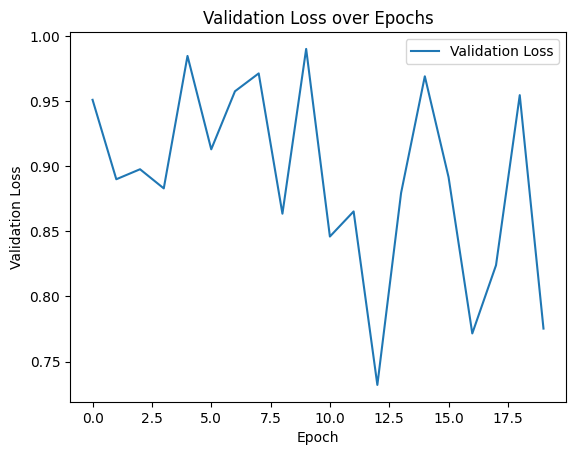

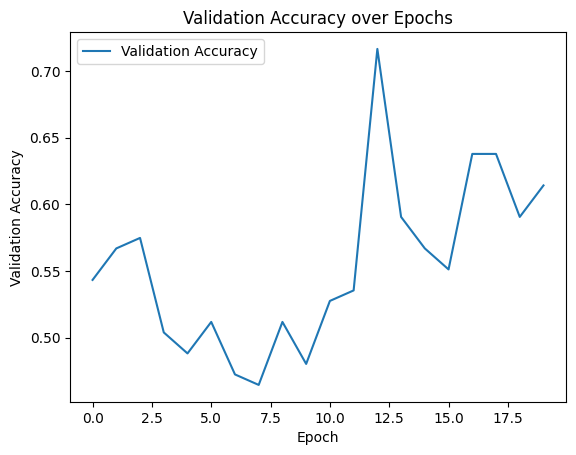

In [19]:
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_vgg = model_vgg.fit(train_data, steps_per_epoch=len(train_data), epochs=20, validation_data=test_data, validation_steps=len(test_data))

plt.plot(history_vgg.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs')
plt.legend()
plt.show()

plt.plot(history_vgg.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.legend()
plt.show()

In [20]:
%matplotlib inline

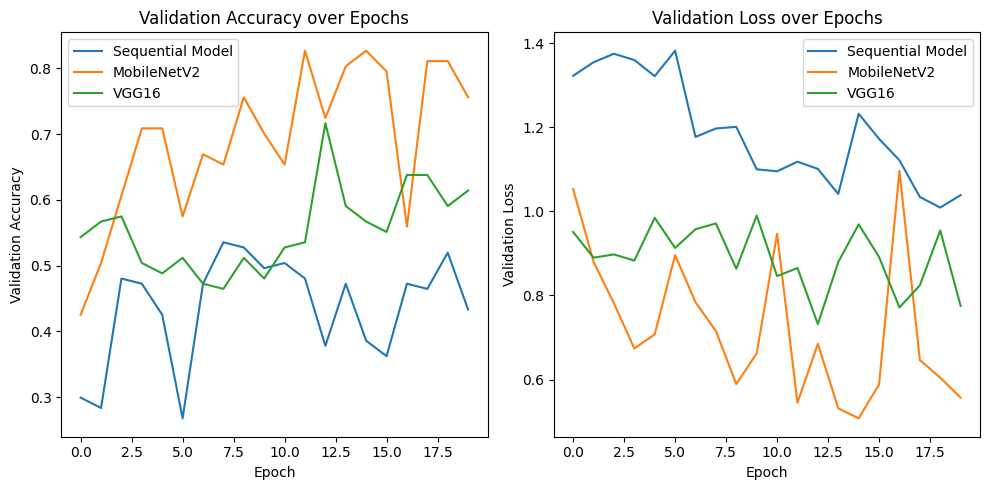

In [21]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.plot(history_sq.history['val_accuracy'], label='Sequential Model')
plt.plot(history_mv.history['val_accuracy'], label='MobileNetV2')
plt.plot(history_vgg.history['val_accuracy'], label='VGG16')

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(history_sq.history['val_loss'], label='Sequential Model')
plt.plot(history_mv.history['val_loss'], label='MobileNetV2')
plt.plot(history_vgg.history['val_loss'], label='VGG16')

plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
model_names = ["Sequential Model", "MobileNetV2", "VGG16"]

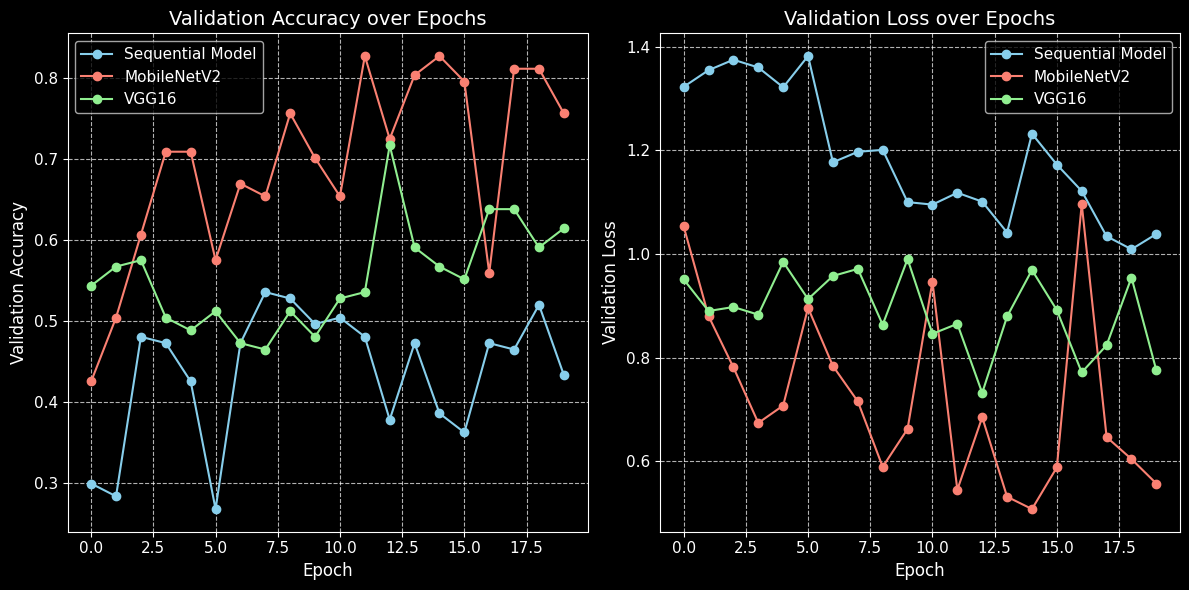

In [31]:
import matplotlib.pyplot as plt


colors = ['skyblue', 'salmon', 'lightgreen']
#colors = ['#ff7f0e', '#1f77b4', '#2ca02c']  # Orange, Blue, Green

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for i, history in enumerate([history_sq, history_mv, history_vgg]):
    plt.plot(history.history['val_accuracy'], label=f'{model_names[i]}', color=colors[i], linestyle='-', marker='o')

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Validation Accuracy over Epochs', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.subplot(1, 2, 2)
for i, history in enumerate([history_sq, history_mv, history_vgg]):
    plt.plot(history.history['val_loss'], label=f'{model_names[i]}', color=colors[i], linestyle='-', marker='o')

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Validation Loss', fontsize=12)
plt.title('Validation Loss over Epochs', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()

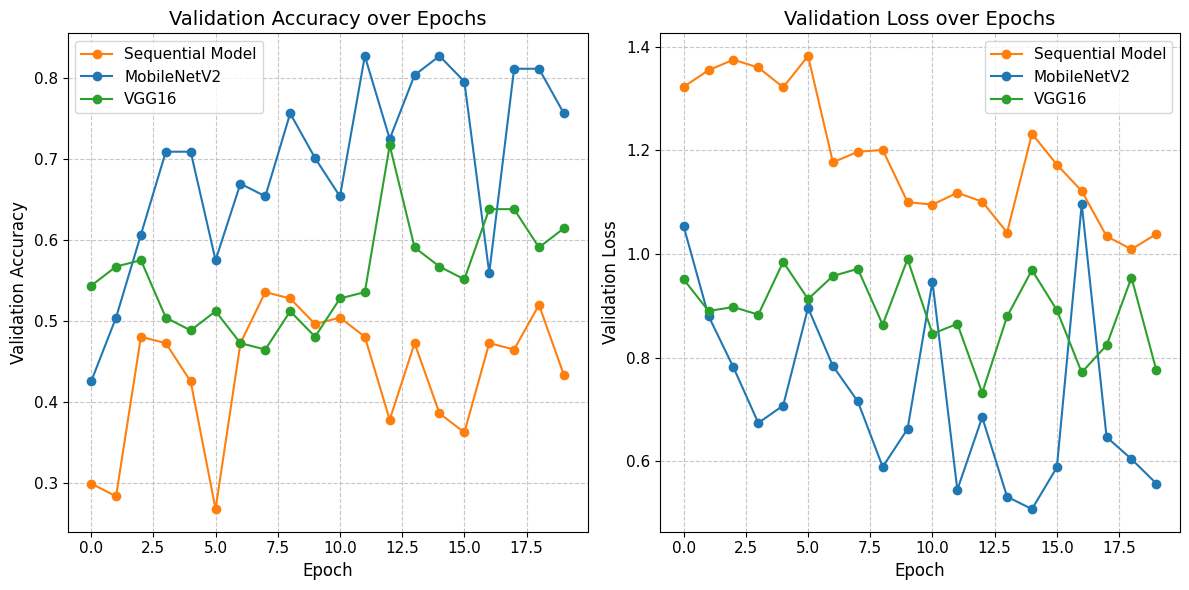

In [24]:
import matplotlib.pyplot as plt


# colors = ['skyblue', 'salmon', 'lightgreen']
colors = ['#ff7f0e', '#1f77b4', '#2ca02c']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for i, history in enumerate([history_sq, history_mv, history_vgg]):
    plt.plot(history.history['val_accuracy'], label=f'{model_names[i]}', color=colors[i], linestyle='-', marker='o')

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Validation Accuracy over Epochs', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.subplot(1, 2, 2)
for i, history in enumerate([history_sq, history_mv, history_vgg]):
    plt.plot(history.history['val_loss'], label=f'{model_names[i]}', color=colors[i], linestyle='-', marker='o')

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Validation Loss', fontsize=12)
plt.title('Validation Loss over Epochs', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()

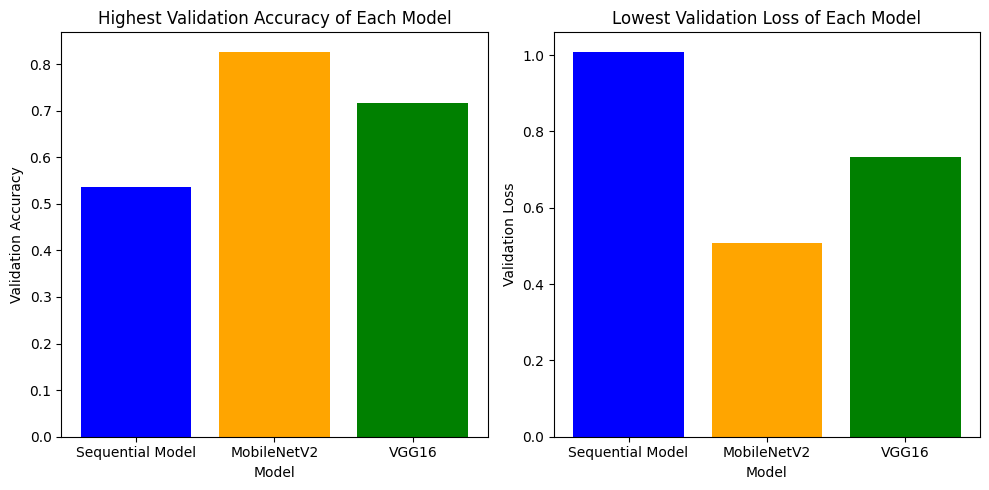

In [25]:
best_val_acc_sq = np.max(history_sq.history['val_accuracy'])
best_val_loss_sq = np.min(history_sq.history['val_loss'])

best_val_acc_mv = np.max(history_mv.history['val_accuracy'])
best_val_loss_mv = np.min(history_mv.history['val_loss'])

best_val_acc_vgg = np.max(history_vgg.history['val_accuracy'])
best_val_loss_vgg = np.min(history_vgg.history['val_loss'])

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(model_names, [best_val_acc_sq, best_val_acc_mv, best_val_acc_vgg], color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.title('Highest Validation Accuracy of Each Model')

plt.subplot(1, 2, 2)
plt.bar(model_names, [best_val_loss_sq, best_val_loss_mv, best_val_loss_vgg], color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Validation Loss')
plt.title('Lowest Validation Loss of Each Model')

plt.tight_layout()
plt.show()

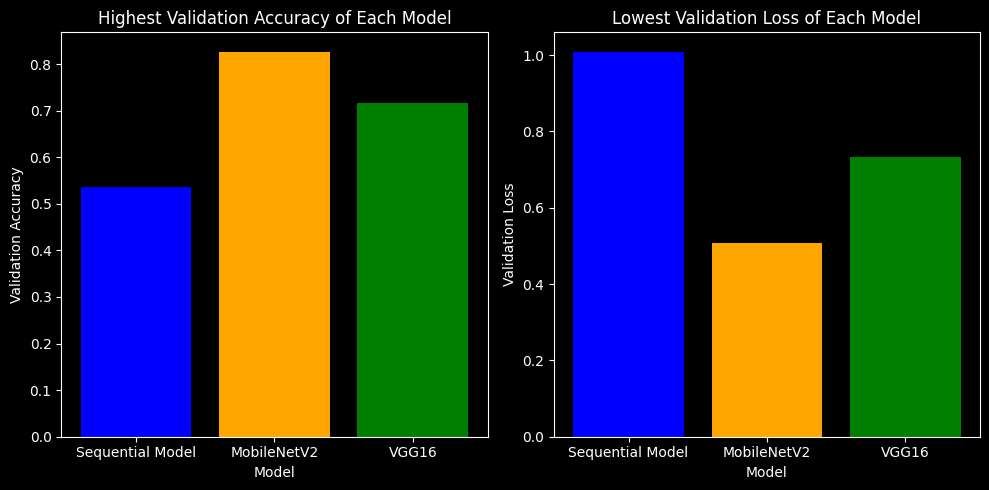

In [26]:
import matplotlib.pyplot as plt

best_val_acc_sq = np.max(history_sq.history['val_accuracy'])
best_val_loss_sq = np.min(history_sq.history['val_loss'])

best_val_acc_mv = np.max(history_mv.history['val_accuracy'])
best_val_loss_mv = np.min(history_mv.history['val_loss'])

best_val_acc_vgg = np.max(history_vgg.history['val_accuracy'])
best_val_loss_vgg = np.min(history_vgg.history['val_loss'])

plt.style.use('dark_background')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(model_names, [best_val_acc_sq, best_val_acc_mv, best_val_acc_vgg], color=['blue', 'orange', 'green'])
plt.xlabel('Model', color='white')
plt.ylabel('Validation Accuracy', color='white')
plt.title('Highest Validation Accuracy of Each Model', color='white')

plt.subplot(1, 2, 2)
plt.bar(model_names, [best_val_loss_sq, best_val_loss_mv, best_val_loss_vgg], color=['blue', 'orange', 'green'])
plt.xlabel('Model', color='white')
plt.ylabel('Validation Loss', color='white')
plt.title('Lowest Validation Loss of Each Model', color='white')

plt.tight_layout()
plt.show()

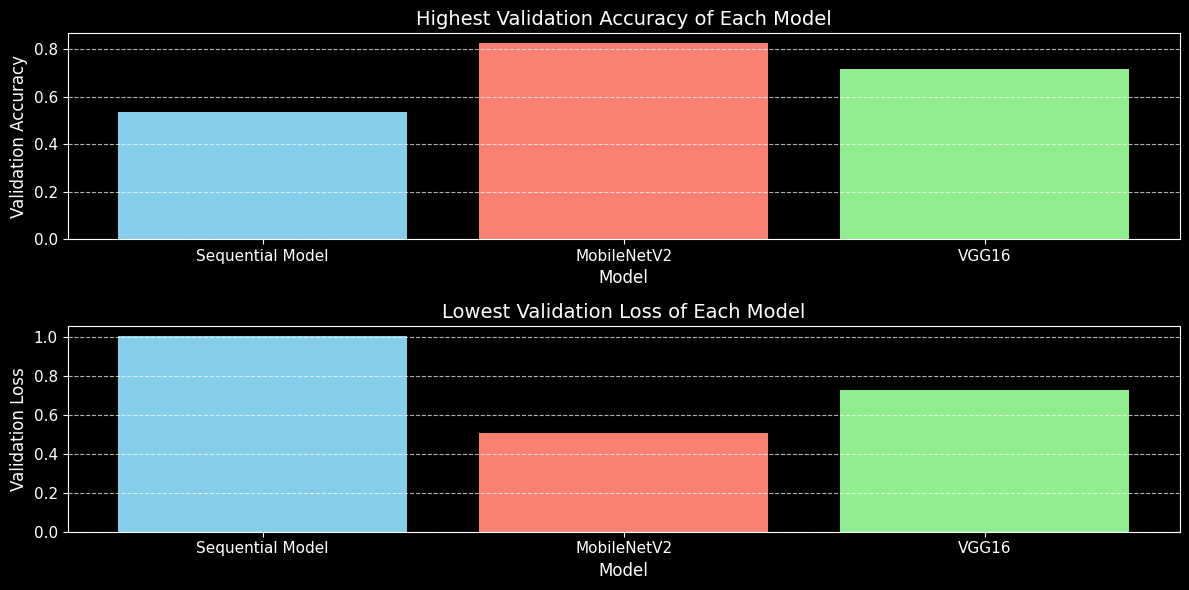

In [27]:
import matplotlib.pyplot as plt

# Data
best_val_acc_sq = np.max(history_sq.history['val_accuracy'])
best_val_loss_sq = np.min(history_sq.history['val_loss'])

best_val_acc_mv = np.max(history_mv.history['val_accuracy'])
best_val_loss_mv = np.min(history_mv.history['val_loss'])

best_val_acc_vgg = np.max(history_vgg.history['val_accuracy'])
best_val_loss_vgg = np.min(history_vgg.history['val_loss'])

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.bar(model_names, [best_val_acc_sq, best_val_acc_mv, best_val_acc_vgg], color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel('Model', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Highest Validation Accuracy of Each Model', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.subplot(2, 1, 2)
plt.bar(model_names, [best_val_loss_sq, best_val_loss_mv, best_val_loss_vgg], color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel('Model', fontsize=12)
plt.ylabel('Validation Loss', fontsize=12)
plt.title('Lowest Validation Loss of Each Model', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()

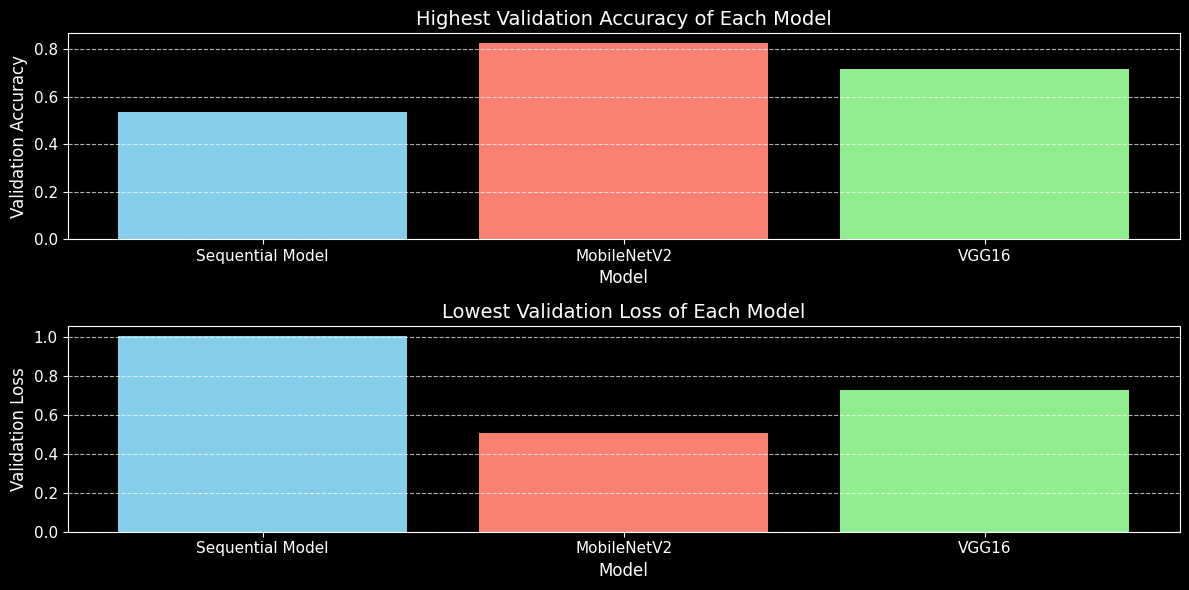

In [28]:
import matplotlib.pyplot as plt

best_val_acc_sq = np.max(history_sq.history['val_accuracy'])
best_val_loss_sq = np.min(history_sq.history['val_loss'])

best_val_acc_mv = np.max(history_mv.history['val_accuracy'])
best_val_loss_mv = np.min(history_mv.history['val_loss'])

best_val_acc_vgg = np.max(history_vgg.history['val_accuracy'])
best_val_loss_vgg = np.min(history_vgg.history['val_loss'])

plt.style.use('dark_background')

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.bar(model_names, [best_val_acc_sq, best_val_acc_mv, best_val_acc_vgg], color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel('Model', fontsize=12, color='white')
plt.ylabel('Validation Accuracy', fontsize=12, color='white')
plt.title('Highest Validation Accuracy of Each Model', fontsize=14, color='white')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=11, color='white')
plt.yticks(fontsize=11, color='white')

plt.subplot(2, 1, 2)
plt.bar(model_names, [best_val_loss_sq, best_val_loss_mv, best_val_loss_vgg], color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel('Model', fontsize=12, color='white')
plt.ylabel('Validation Loss', fontsize=12, color='white')
plt.title('Lowest Validation Loss of Each Model', fontsize=14, color='white')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=11, color='white')
plt.yticks(fontsize=11, color='white')

plt.tight_layout()
plt.show()